<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [1]:
# Utilice este espacio para escribir el código.
# Librerias
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar datos
lfw_dataset = fetch_lfw_people(data_home="data")

Haciendo uso de la función fetch_lfw_people de la librería de scikit-learn, cargamos los datos tal y como nos explican en el enunciado.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [2]:
# Utilice este espacio para escribir el código.
lfw_dataset.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

labeled_faces_in_the_wild_dataset: Es el conjunto de datos de reconocimiento de rostros etiquetados en la naturaleza. Este conjunto de datos es una colección de imágenes JPEG de personas famosas recopiladas a través de Internet. Además, todos los detalles están disponibles en el sitio web oficial:nn http://vis-www.cs.umass.edu/lfw/nnCada .

In [3]:
lfw_dataset.images

array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
          25.666666,  30.666666],
        [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
          26.666666,  32.      ],
        [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
          28.      ,  35.666668],
        ...,
        [166.      ,  97.      ,  44.333332, ...,   9.666667,
          14.333333,  12.333333],
        [ 64.      ,  38.666668,  30.      , ...,  12.666667,
          16.      ,  14.      ],
        [ 30.666666,  29.      ,  26.333334, ...,  14.666667,
          16.      ,  14.      ]],

       [[158.      , 160.66667 , 169.66667 , ...,  74.333336,
          28.      ,  15.666667],
        [156.      , 155.33333 , 163.33333 , ...,  83.      ,
          25.666666,  14.      ],
        [146.66667 , 143.66667 , 144.66667 , ...,  82.333336,
          26.      ,  14.666667],
        ...,
        [118.666664, 120.      , 170.      , ..., 131.33333 ,
         127.333336, 126.      ],
        [125

In [4]:
lfw_dataset.images.shape

(13233, 62, 47)

 El conjunto de datos lfw_dataset contiene 13233 imágenes. Cada imagen tiene una resolución de 62 x 47 píxeles. En otras palabras, cada imagen tiene 62 filas y 47 columnas de píxeles.

In [5]:
n_samples, h, w = lfw_dataset.images.shape

In [6]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = lfw_dataset.data
X = pd.DataFrame(X)

y = lfw_dataset.target
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,5360,34.000000,29.333334,22.333334,22.000000,25.666666,29.000000,38.666668,68.333336,96.333336,...,26.666666,17.333334,11.000000,8.000000,4.333333,5.666667,11.333333,14.666667,16.000000,14.000000
1,3434,158.000000,160.666672,169.666672,168.333328,162.666672,161.000000,158.333328,162.666672,163.000000,...,217.666672,198.666672,169.000000,122.000000,106.333336,117.666664,133.000000,138.666672,135.333328,130.333328
2,3807,77.000000,81.333336,88.000000,108.666664,136.000000,151.333328,155.000000,164.666672,168.000000,...,177.666672,190.666672,219.333328,227.000000,218.666672,210.666672,202.000000,192.000000,145.333328,66.333336
3,26,11.333333,11.333333,11.666667,12.666667,13.666667,15.000000,15.000000,13.000000,13.000000,...,121.333336,123.333336,124.000000,121.000000,118.333336,120.666664,123.000000,118.000000,106.333336,92.333336
4,3957,32.333332,31.333334,31.333334,33.666668,33.000000,32.333332,36.333332,43.333332,43.000000,...,19.000000,11.000000,9.000000,12.666667,18.000000,17.666666,17.000000,17.000000,19.666666,22.666666


En este paso, se comprime la dimensión de las imágenes de 62x47, por lo que cada imagen queda expresada en un registro del dataframe 'df'. El resultado de multiplicar 62x47 es 2914. De allí que la matriz contenga 2914 columnas y una columna 'pid' que hace referencia al id de cada persona representada en la imagen.

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [7]:
# Utilice este espacio para escribir el código.
image_counts = df['pid'].value_counts()
image_counts_df = image_counts.to_frame().reset_index()
image_counts_df.columns = ['pid', 'image_count']
image_counts_df

,pid,image_count
0,1871,530
1,1047,236
2,5458,144
3,1404,121
4,1892,109
...,...,...
5744,4750,1
5745,3352,1
5746,3012,1
5747,5025,1


In [8]:
image_counts_df['image_count'].describe()

count    5749.000000
mean        2.301792
std         9.016410
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       530.000000
Name: image_count, dtype: float64

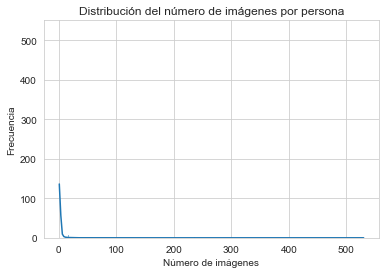

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.histplot(image_counts, kde=True)
ax = plt.gca()
ax.set_ylim(0, 550)
plt.title('Distribución del número de imágenes por persona')
plt.xlabel('Número de imágenes')
plt.ylabel('Frecuencia')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

In [10]:
# Utilice este espacio para escribir el código.
target_names = lfw_dataset.target_names
serena_williams_pid = np.where(target_names == 'Serena Williams')[0][0]
serena_williams_image_count = image_counts[serena_williams_pid]
print(f'Serena Williams tiene {serena_williams_image_count} imágenes en el dataset.')


Serena Williams tiene 52 imágenes en el dataset.


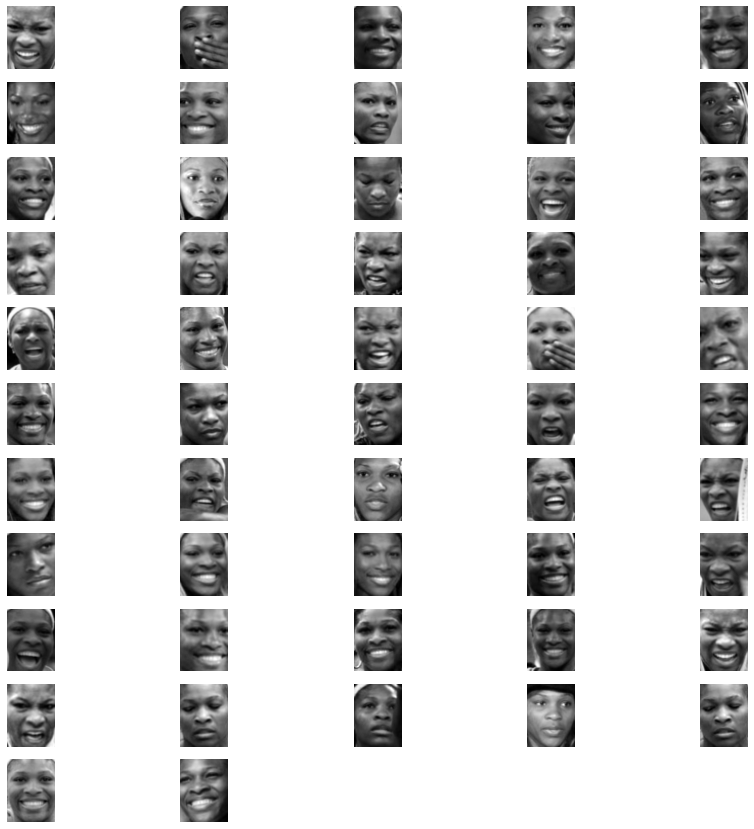

In [11]:
serena_williams_images = df[df['pid'] == serena_williams_pid].drop('pid', axis=1).values
n_images = len(serena_williams_images)
n_cols = 5
n_rows = int(np.ceil(n_images / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):
    if i < n_images:
        ax.imshow(serena_williams_images[i].reshape((h, w)), cmap='gray')
        ax.axis('off')
    else:
        ax.remove()
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

In [12]:
# Utilice este espacio para escribir el código.
rostro_promedio = df.mean()
rostro_promedio = rostro_promedio.to_frame().T
rostro_promedio = rostro_promedio.drop('pid', axis=1)
rostro_promedio


,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,73.64502,76.609215,82.047195,89.338463,97.436172,105.404922,113.072159,120.380386,127.049438,132.753311,...,100.214882,104.268295,107.929878,110.543449,111.502693,110.941605,109.213936,106.370956,102.723381,99.468056


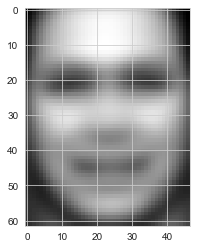

In [13]:
img_rostro_promedio=rostro_promedio.iloc[0].to_numpy().reshape(h,w)
plt.imshow(img_rostro_promedio, cmap=plt.cm.gray)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).   jjjjjjjj


#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

In [14]:
# Eliminar temporalmente la columna pid para que no se vea afectada por la resta vs. rostro_promedio
columna_a_mantener = 'pid'
df_temp = df.drop(columna_a_mantener, axis=1)
df_temp = df_temp-df_temp.mean()

# Restauramos los valores originales de dip en el df transformado
df_temp[columna_a_mantener] = df[columna_a_mantener]
df_temp


,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,pid
0,-39.645020,-47.275879,-59.713860,-67.338463,-71.769508,-76.404922,-74.405487,-52.047050,-30.716103,-16.086647,...,-86.934959,-96.929878,-102.543449,-107.169357,-105.274940,-97.880600,-91.704292,-86.723381,-85.468056,5360
1,84.354980,84.057457,87.619476,78.994865,65.230499,55.595078,45.261169,42.286285,35.950562,26.246689,...,94.398376,61.070122,11.456551,-5.169357,6.725060,23.786064,32.295715,32.609947,30.865273,3434
2,3.354980,4.724121,5.952805,19.328201,38.563828,45.928406,41.927841,44.286285,40.950562,39.246689,...,86.398376,111.403450,116.456551,107.163979,99.725067,92.786064,85.629044,42.609947,-33.134720,3807
3,-62.311687,-65.275879,-70.380531,-76.671799,-83.769508,-90.404922,-98.072159,-107.380386,-114.049438,-118.753311,...,19.065041,16.070122,10.456551,6.830643,9.725060,13.786064,11.629044,3.609955,-7.134720,26
4,-41.311687,-45.275879,-50.713860,-55.671795,-64.436172,-73.071594,-76.738831,-77.047058,-84.049438,-96.753311,...,-93.268295,-98.929878,-97.876785,-93.502693,-93.274940,-92.213936,-89.370956,-83.056717,-76.801392,3957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,-44.311684,-50.609215,-56.380531,-56.338463,-46.769505,-32.071587,-21.405495,-13.713722,-9.382774,-7.086647,...,-16.934959,-77.929878,-92.543449,-89.169357,-95.274940,-95.213936,-87.704292,-79.390045,-62.468056,5252
13229,37.021645,39.057449,51.286133,64.661537,72.897156,77.928406,77.927841,73.952942,68.283890,64.580017,...,9.065041,8.736786,1.123215,-13.836029,-40.274940,-34.213936,-13.704292,-31.390045,-53.134724,2122
13230,-35.645020,-34.942547,-26.713863,-14.338463,7.897163,16.261742,8.594505,1.952950,-2.382774,-5.753311,...,44.065033,-44.929878,-52.210117,-44.169357,-45.941605,-46.213936,-40.370956,-39.056713,-45.134724,2175
13231,-56.978355,-52.275879,-21.713863,25.994873,34.563828,29.595078,18.594513,1.619614,-15.382774,-24.086647,...,132.065033,137.070129,129.456543,125.163979,131.391724,132.786072,112.629044,40.609947,-30.134720,373


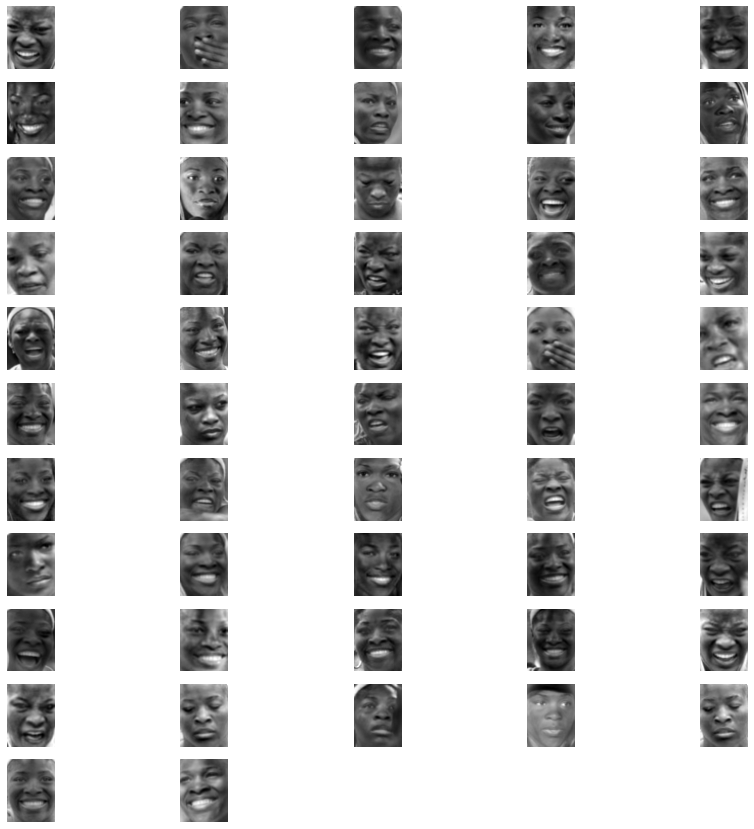

In [15]:
serena_williams_images_menos_rostro_promedio = df_temp[df_temp['pid'] == serena_williams_pid].drop('pid', axis=1).values
n_images = len(serena_williams_images_menos_rostro_promedio)
n_cols = 5
n_rows = int(np.ceil(n_images / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):
    if i < n_images:
        ax.imshow(serena_williams_images_menos_rostro_promedio[i].reshape((h, w)), cmap='gray')
        ax.axis('off')
    else:
        ax.remove()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [16]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd
U,S,Vt = svd(df_temp)

In [17]:
l= 1000 # valores singulares retenidos

S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal

S2.shape #tenemos una matriz de dimensión 1000 x 1000

(1000, 1000)

In [18]:
def svd_truncada(l, X):
    """
     Esta función retorna la aproximación a la matriz original a partir de la SVD truncada

    Parameters:
        l (int):  número de valores singulares a utilizar en la reconstrucción
        X (array): matriz original a descomponer

    Returns:
        resultado (array): reconstrucción de X con l componentes principales
    """
    # SVD 
    U,S,Vt = svd(df_temp)

    
    S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal
    
    # SVD truncada
    return(np.dot(U[:,0:l],np.dot(S2,Vt[0:l,:])))
    

In [19]:
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
sum(var_explained[0:1000])

0.9992429999999943

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [20]:
# Utilice este espacio para escribir el código.
serena_williams_images.shape

(52, 2914)

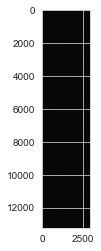

In [21]:
plt.imshow(svd_truncada(1000,serena_williams_images),cmap='gray')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [22]:
# Utilice este espacio para escribir el código.
is_bush=[]
for i in lfw_dataset.target:
    if target_names[i] == 'George W Bush':
        it_is=1
        is_bush.append(it_is)
    else:
        it_is=0
        is_bush.append(it_is)
len(is_bush)

13233

In [23]:

print(len(is_bush))
print(X.shape)

13233
(13233, 2914)


Recorriendo el set de nombres 'target_names' creamos un if que retorne 1 en caso que el nombre corresponda a George W Bush y 0 de lo contrario

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [24]:
# Utilice este espacio para escribir el código.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y=is_bush

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 10101,
                                        shuffle      = True
                                    )

Paso inicial, importar las librerías a utilizar. Luego, haciendo uso de la librería de sklearn: model_selection, dividimos nuestro set de datos en entrenamiento y prueba utilizando los parámetros establecidos en el enunciado

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [26]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd # Cargamos la función SVD

# Estandarizamos los datos
mu1 = X_train.mean()
sigma1 = X_train.std()
X_train1 = (X_train - mu1)/sigma1

#Extraemos las matrices SVD para el set de entrenamiento:
U_tr,S_tr,V_tr=svd(X_train1)

# Estandarizamos los datos
mu2 = X_test.mean()
sigma2 = X_test.std()
X_test1 = (X_test - mu2)/sigma2

#Extraemos las matrices SVD para el set de prueba:
U_te,S_te,V_te=svd(X_test1)


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.
k=1000

svd = TruncatedSVD(n_components=k)
X_train_svd = svd.fit_transform(X_train1)
X_test_svd = svd.transform(X_test1)


Modelo_Logistico.fit(X = X_train_svd, y = y_train)



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=10101, solver='sag')

In [31]:

y_pred = Modelo_Logistico.predict(X_test_svd)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.9588213071401587


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [37]:
# Utilice este espacio para escribir el código.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

n_components_values = [500, 1000, 1500, 2000, 2914]
for n_components in n_components_values:
    print(f'Validación cruzada para n_components = {n_components}')
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X_train1)
    model = Modelo_Logistico
    scores = cross_val_score(model, X_svd, y_train, cv=5, n_jobs=-1)  # 5-fold cross-validation
    print('Precisión promedio:', np.mean(scores))
    print()




Validación cruzada para n_components = 500
Precisión promedio: 0.9617423679793461

Validación cruzada para n_components = 1000
Precisión promedio: 0.9593807582219214

Validación cruzada para n_components = 1500
Precisión promedio: 0.9606090004786113

Validación cruzada para n_components = 2000
Precisión promedio: 0.9613647423639649

Validación cruzada para n_components = 2914


ValueError: n_components must be < n_features; got 2914 >= 2914

In [36]:
n_components_values = [100,200, 300]
for n_components in n_components_values:
    print(f'Validación cruzada para n_components = {n_components}')
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X_train1)
    model = Modelo_Logistico
    scores = cross_val_score(model, X_svd, y_train, cv=5, n_jobs=-1)  # 5-fold cross-validation
    print('Precisión promedio:', np.mean(scores)) 
    print()

Validación cruzada para n_components = 100
Precisión promedio: 0.96807087550175

Validación cruzada para n_components = 200
Precisión promedio: 0.9705271815952787

Validación cruzada para n_components = 300
Precisión promedio: 0.9686382060240787



In [ ]:
##Revisar ejemplo para sacar las caras :)

serena_williams_images_menos_rostro_promedio = df_temp[df_temp['pid'] == serena_williams_pid].drop('pid', axis=1).values
n_images = len(serena_williams_images_menos_rostro_promedio)
n_cols = 5
n_rows = int(np.ceil(n_images / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):
    if i < n_images:
        ax.imshow(serena_williams_images_menos_rostro_promedio[i].reshape((h, w)), cmap='gray')
        ax.axis('off')
    else:
        ax.remove()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).